# Baseball Case Study


# Problem Definition:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

# Importing Necessary Libraries:

In [6]:
# Analysising libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore,boxcox

# Machine Learning library

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings
warnings.filterwarnings('ignore')

# Loading Data:

In [7]:
# we are loading the csv data which was provided to us.
df=pd.read_csv('Baseball Case Study')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


* Here we can see the whole dataset

In [8]:
# lets check first 5 Rows of the dataset.
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


* Here we can see the top 5 rows present in the dataset


In [9]:
# Now we will also check the bottom five rows as well.
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


* These are the bottom five rows of the dataset.

# Exploring Data sets:


In [10]:
# lets check the datatype/dtypes of all the columns
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Observation :
    - All value is in numeric only so no need to use label encoder
    - 16 integer and 1 float variable present in dataset.No categorical value present in 
       dataset.

In [11]:
# Lets now check the Statistical summary of the dataset provided and trying to learn and study the dataset.
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Key Observations:

* Here we can observe that there is some difference between mean and median(i.e. 50% percentile), so there might be some skewness present in this dataset.

* we can also observe that there is some difference between values of 75 percentile an maximum, we will find some outliers in the dataset too.

* while looking at standard deviation column we can observe that values are very high in many columns(except, CG, SHO, SV, etc.) it means that the data will be spreaded widely.

In [12]:
# lets rename the names of coulumn to understand data better.
df.rename(columns={"W" : "Wins", "R" : "Runs Scored" , "AB" : "At Bats", "H" : "Single", "2B" : "Doubles", "3B": "Triples", "HR": "Home Runs", "BB": "Walks", "SO": "Stikeouts", "SB": "Stolen Bases", "RA" : "Runs Allowed", "ER": "Earned Runs", "ERA":"Earned Run Average", "CG": "Complete Games", "SHO": "Shutouts", "SV": "Saves", "E": "Errors"}, inplace=True)
df.head()

,Wins,Runs Scored,At Bats,Single,Doubles,Triples,Home Runs,Walks,Stikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


* We have successfully updated the names of the columns, which are now easy to understand.


In [13]:
# now we will check the shape of the dataset using df.shape
df.shape

(30, 17)

* Here we get the information that there are 30 rows and 17 columns present in the given dataset


In [14]:
# lets see the information in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs Scored         30 non-null     int64  
 2   At Bats             30 non-null     int64  
 3   Single              30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home Runs           30 non-null     int64  
 7   Walks               30 non-null     int64  
 8   Stikeouts           30 non-null     int64  
 9   Stolen Bases        30 non-null     int64  
 10  Runs Allowed        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Games      30 non-null     int64  
 14  Shutouts            30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

* Here we can see that there are total 16 feature columns and 1 target column Wins present in the dataset.
* Target columns datatype is integer, 15 of the feature columns are integer columns too, only Earned Run Average is a float column.

In [15]:
# Let's check whether there are any missing/NaN values in the dataset or not?
df.isnull().sum()

Wins                  0
Runs Scored           0
At Bats               0
Single                0
Doubles               0
Triples               0
Home Runs             0
Walks                 0
Stikeouts             0
Stolen Bases          0
Runs Allowed          0
Earned Runs           0
Earned Run Average    0
Complete Games        0
Shutouts              0
Saves                 0
Errors                0
dtype: int64

* We can see that there are no Null/ NaN Values present in the dataset.


# Heatmap

<AxesSubplot:>

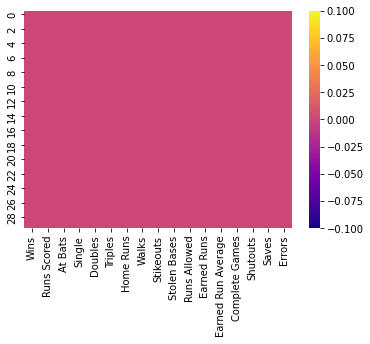

In [17]:
sns.heatmap(df.isnull(),cmap='plasma')

Using Visualizing data plot to re check null value and heatmap plot is showing their is no null value present in the dataset



# EDA


In [22]:
# Statiscal summary

df.describe()

,Wins,Runs Scored,At Bats,Single,Doubles,Triples,Home Runs,Walks,Stikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


* In above description some of column having outlier and skewness.we will observe the data using some other techniques.


Wins                     AxesSubplot(0.125,0.536818;0.0731132x0.343182)
Runs Scored           AxesSubplot(0.212736,0.536818;0.0731132x0.343182)
At Bats               AxesSubplot(0.300472,0.536818;0.0731132x0.343182)
Single                AxesSubplot(0.388208,0.536818;0.0731132x0.343182)
Doubles               AxesSubplot(0.475943,0.536818;0.0731132x0.343182)
Triples               AxesSubplot(0.563679,0.536818;0.0731132x0.343182)
Home Runs             AxesSubplot(0.651415,0.536818;0.0731132x0.343182)
Walks                 AxesSubplot(0.739151,0.536818;0.0731132x0.343182)
Stikeouts             AxesSubplot(0.826887,0.536818;0.0731132x0.343182)
Stolen Bases                AxesSubplot(0.125,0.125;0.0731132x0.343182)
Runs Allowed             AxesSubplot(0.212736,0.125;0.0731132x0.343182)
Earned Runs              AxesSubplot(0.300472,0.125;0.0731132x0.343182)
Earned Run Average       AxesSubplot(0.388208,0.125;0.0731132x0.343182)
Complete Games           AxesSubplot(0.475943,0.125;0.0731132x0.

<Figure size 7200x14400 with 0 Axes>

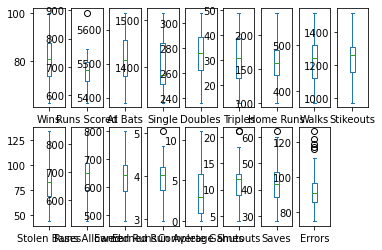

In [23]:
# We observed presence of outliers during df.descibe() lets verify using box plot

plt.figure(figsize=(100,200))
df.plot(kind="box", subplots=True, layout=(2,9))

* We can Observe some outliers present in few columns
* Runs Score, Earned Run Average, Shutouts, Saves and Errors.

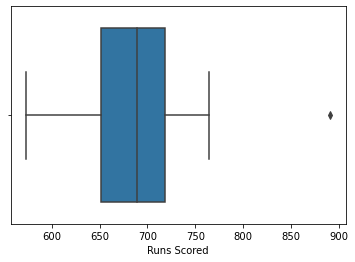

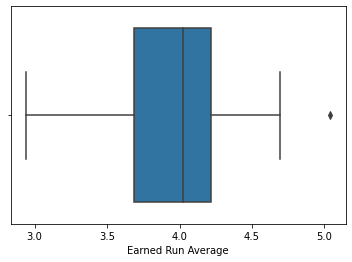

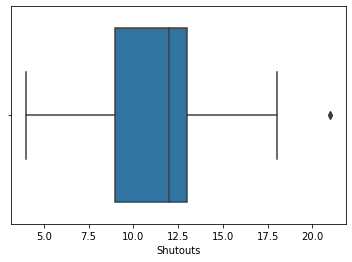

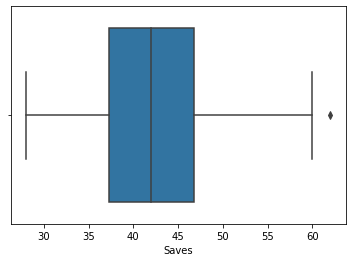

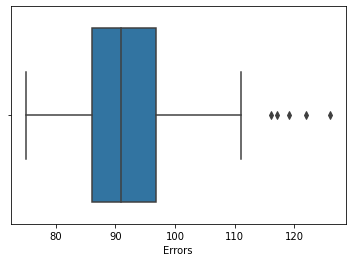

In [24]:
out=["Runs Scored","Earned Run Average","Shutouts","Saves","Errors"]
for i in out:
    sns.boxplot(df[i])
    plt.show()

* Presence of outliers are confirmed using boxplot


# Skewness

In [28]:
# lets check whether skewness is present in this dataset or not?
df.skew()

Wins                  0.047089
Runs Scored           1.200786
At Bats               0.183437
Single                0.670254
Doubles              -0.230650
Triples               0.129502
Home Runs             0.516441
Walks                 0.158498
Stikeouts            -0.156065
Stolen Bases          0.479893
Runs Allowed          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Games        0.736845
Shutouts              0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

Observation :

* As per standard their is some skewness present in Runs Scored, Singles, Complete Games, Shutouts, Saves, Errors.
* We need to handle the skewness
* Checking distribution plot for more detail.

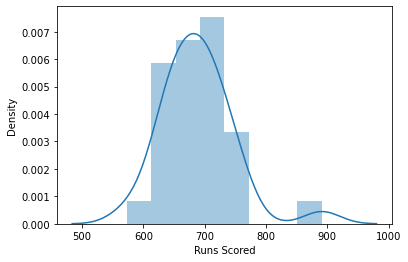

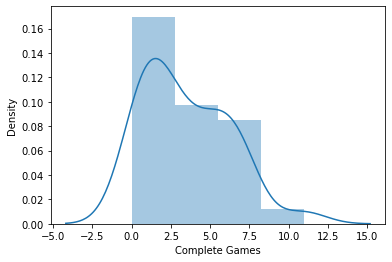

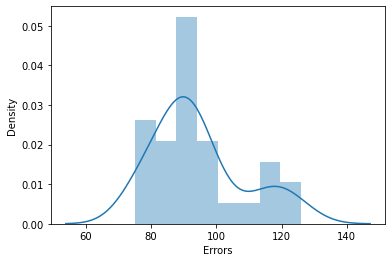

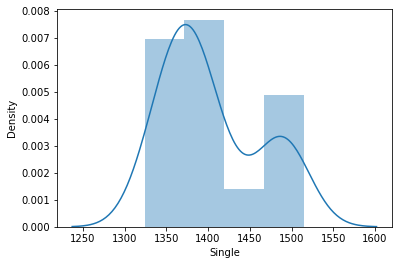

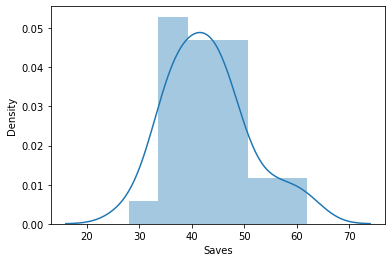

In [29]:
skew=['Runs Scored', 'Complete Games', 'Errors','Single','Saves']
for i in skew:
    sns.distplot(df[i])
    plt.show()

# Univariant Analysis


<AxesSubplot:>

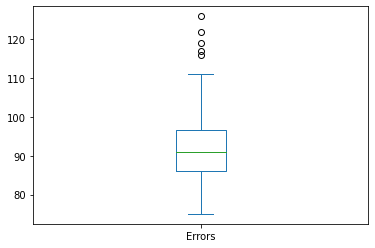

In [30]:
df['Errors'].plot(kind='box')

<AxesSubplot:>

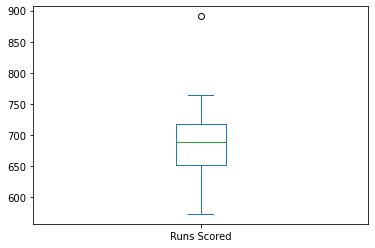

In [31]:
df['Runs Scored'].plot(kind='box')

# Removing outlier from Data


In [33]:
# Removing the Outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Wins,Runs Scored,At Bats,Single,Doubles,Triples,Home Runs,Walks,Stikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,1.365409,0.619078,0.847731,1.663685,1.420173,1.041193,0.787299,1.534902,2.697630,0.913883,0.666234,0.505110,0.506955,0.539806,0.814629,1.671607,0.461470
1,0.197838,0.134432,0.711094,0.970681,0.127403,1.235809,0.243967,0.536592,0.154878,0.601826,0.165971,0.248930,0.254598,0.539806,0.172800,0.249879,0.607197
2,0.003243,0.332906,1.115233,0.151891,1.588795,0.223808,0.723377,1.139144,0.893982,0.111449,0.680339,0.751623,0.641347,2.772641,0.320914,0.654856,1.117242
3,0.483244,1.146419,0.241522,0.401088,0.828122,0.418423,0.883181,1.160536,0.168602,0.690985,0.180076,0.103922,0.053010,1.300442,0.567771,0.784104,0.485758
4,0.677839,0.013270,1.280738,1.984081,0.801892,1.722347,0.403770,0.251360,0.105866,0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,1.042600,0.607197
5,1.170814,3.509647,0.104884,1.361089,1.869832,1.391501,2.185047,1.798742,0.952796,0.200609,0.257184,0.389104,0.350165,1.300442,0.320914,1.171848,0.461470
6,0.587028,1.311430,0.732263,0.116292,0.153633,1.196885,1.545833,1.513510,0.207812,0.913883,0.137760,0.234429,0.165003,0.171757,1.802057,0.637623,0.097152
7,0.003243,0.428681,0.451289,0.596886,1.615025,1.099578,1.705636,0.910958,0.811641,1.760897,0.067235,0.147424,0.209800,1.275906,0.320914,0.008617,1.262970
8,0.094054,0.765626,0.451289,0.365489,0.183611,0.068115,0.107601,0.590073,0.605790,0.156029,0.652129,0.461608,0.484557,0.907856,0.172800,2.188598,0.048576
9,0.288649,1.034489,1.785913,1.628086,1.082929,0.165423,0.084163,0.158660,0.982204,0.557246,0.913544,0.843461,0.792164,0.171757,0.320914,0.396360,0.194303


In [34]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [38]:
df1=df[(z<3).all(axis=1)]
df1

,Wins,Runs Scored,At Bats,Single,Doubles,Triples,Home Runs,Walks,Stikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [39]:
df.shape

(30, 17)

In [40]:
df1.shape

(29, 17)

* We lost one row while removing the outliers. Outliers are removed successfully.


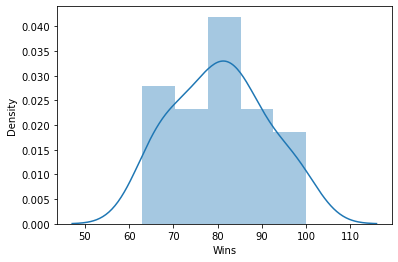

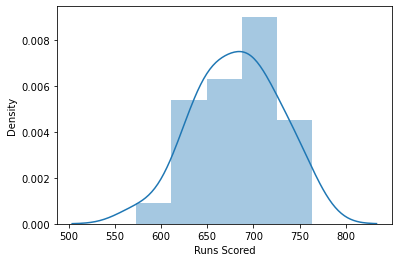

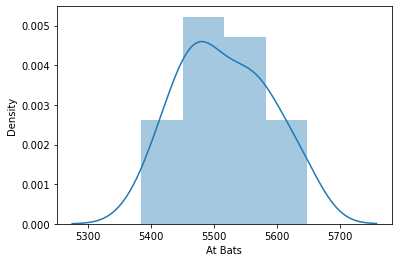

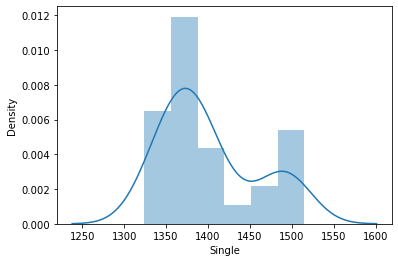

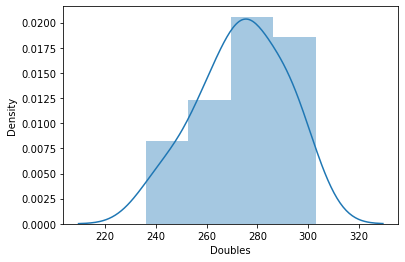

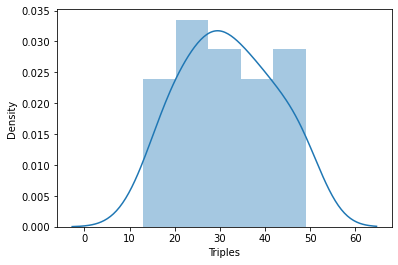

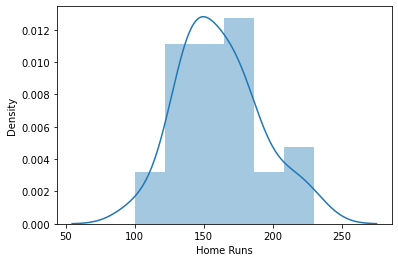

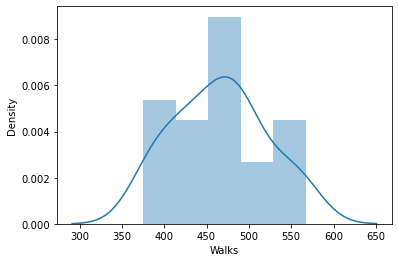

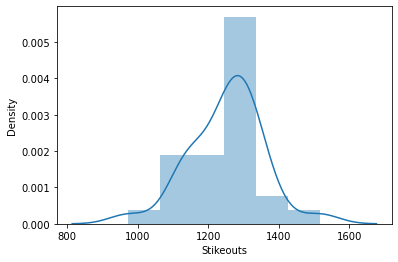

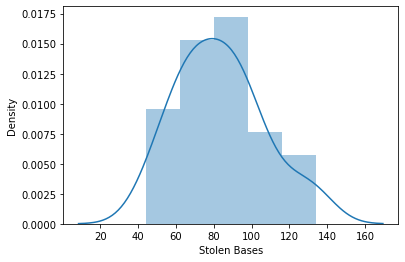

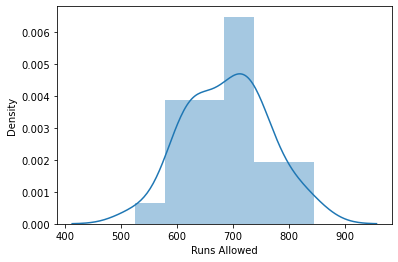

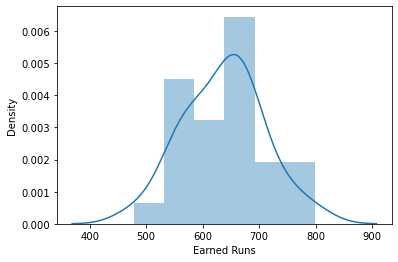

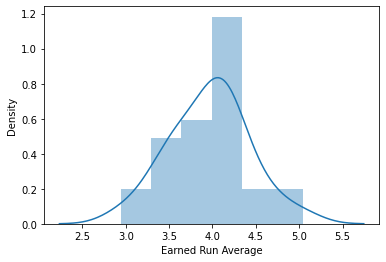

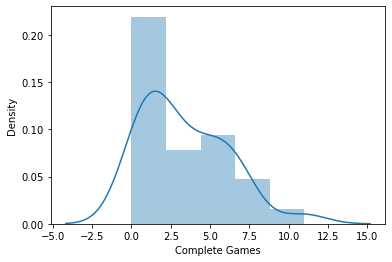

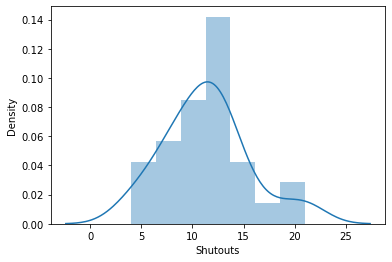

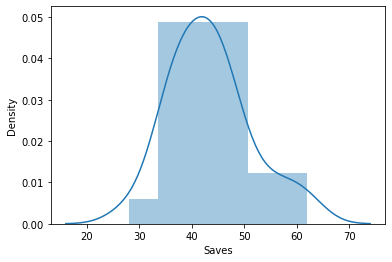

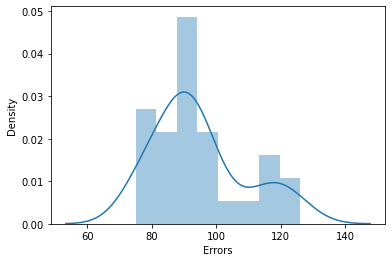

In [41]:
# Lets check for Skewness after removing outliers whether there is any difference in skewness as well?
for i in df1.columns:
    plt.figure()
    sns.distplot(df1[i])
    plt.show()

* After removing outliers we can observe that even skewness has been normalised to an extant, if we remove more data to normalize skewness then removing more data might affect our model predicition.

# Checking Correlation of data


In [42]:
# Now we are checking the correlation
df1.corr()

,Wins,Runs Scored,At Bats,Single,Doubles,Triples,Home Runs,Walks,Stikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
Wins,1.000000,0.390451,-0.085780,-0.018360,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.029594,0.497526,0.749290,-0.072858
Runs Scored,0.390451,1.000000,0.438022,0.433525,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.101438,-0.085108,0.061381,0.043123
At Bats,-0.085780,0.438022,1.000000,0.769159,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.078511,-0.198872,-0.113342,0.316297
Single,-0.018360,0.433525,0.769159,1.000000,0.528016,0.582024,-0.218711,-0.222271,-0.371861,0.417877,0.244606,0.280571,0.256458,0.092577,-0.135116,-0.079814,-0.011945
Doubles,0.384886,0.469293,0.490752,0.528016,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.244856,0.084060,0.269999,0.145032
Triples,-0.206737,0.134204,0.445604,0.582024,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.003733,-0.058896,-0.210627,0.108610
Home Runs,0.245697,0.586894,-0.064653,-0.218711,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.065978,0.005546,0.066984,-0.189790
Walks,0.447513,0.258450,-0.137850,-0.222271,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.417437,0.473922,0.187101,-0.050114
Stikeouts,0.156469,0.081158,-0.111243,-0.371861,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.053075,0.231230,0.091394,0.142740
Stolen Bases,-0.169503,0.075323,0.373674,0.417877,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.030708,-0.104602,-0.179741,0.082702


<AxesSubplot:>

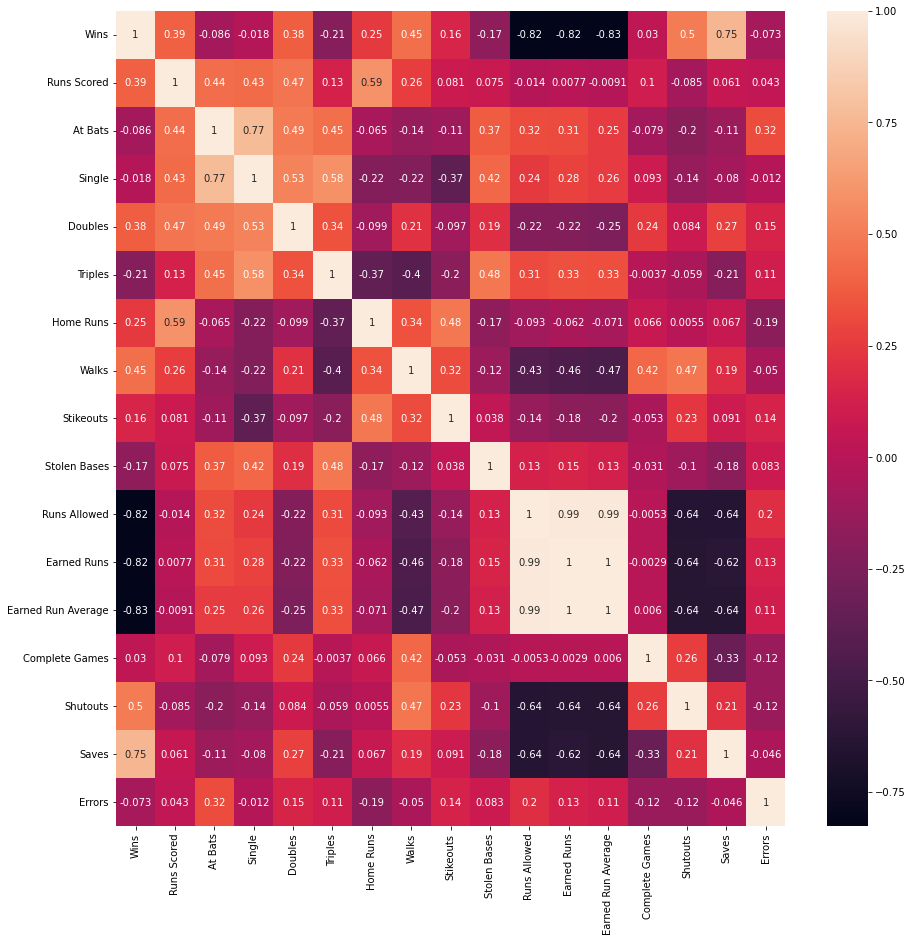

In [43]:
# Checking correlation among all columns using heatmap as well
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(), annot=True)

while visualizing above heat map, we can observe that there are three columns(Runs Allowed, Earned Runs, Earned Run Average) which are highly negative correlated to our target column i.e. Wins.Dropping them might help our model to predict better.

In [44]:
# Dropping the highly negative columns
df1.drop(["Earned Runs", "Earned Run Average"], axis=1, inplace=True)

In [45]:
df1.head()

,Wins,Runs Scored,At Bats,Single,Doubles,Triples,Home Runs,Walks,Stikeouts,Stolen Bases,Runs Allowed,Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,7,12,35,86


* Now we can see that we have successfully removed the negatively correlated columns from the dataset


In [46]:
# Lets check the shape once again
df1.shape

(29, 15)

In [47]:
# Lets check the shape once again
df1.shape

(29, 15)

* Even df.shape confirms that we have successfully removed the negatively correlated columns from the dataset.


# Bivariate Analysis:


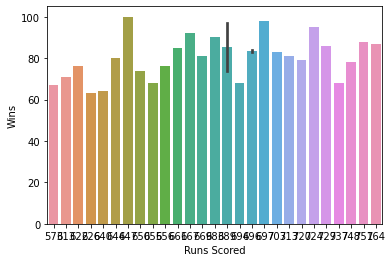

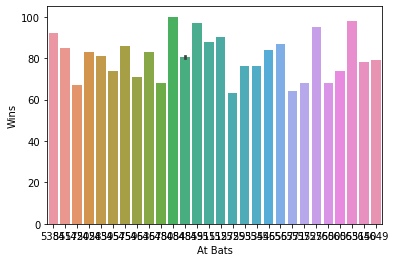

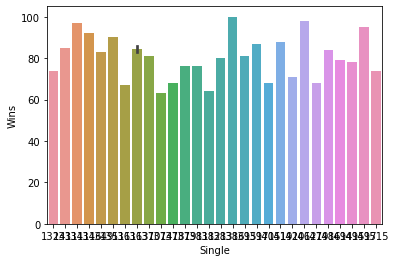

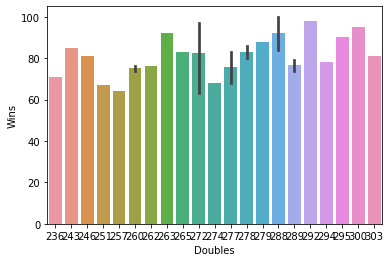

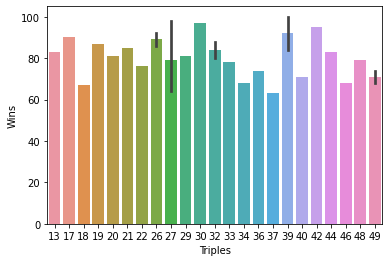

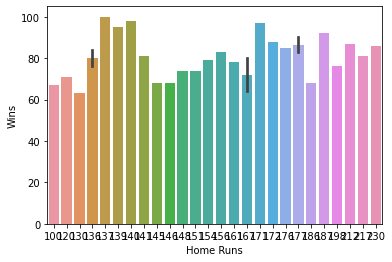

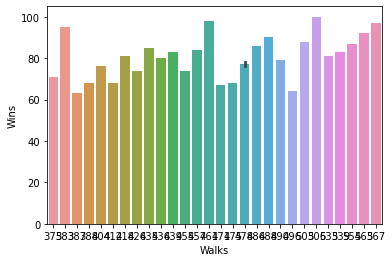

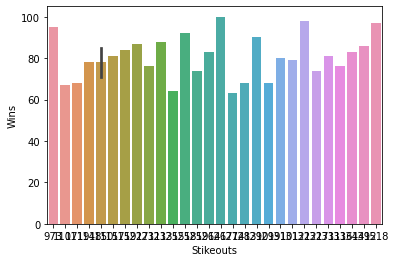

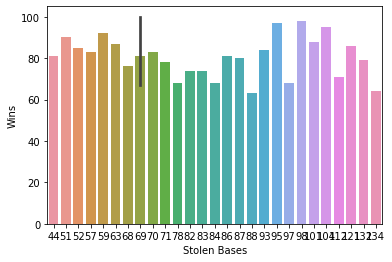

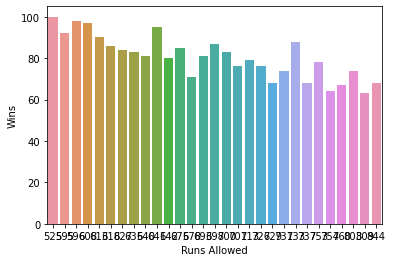

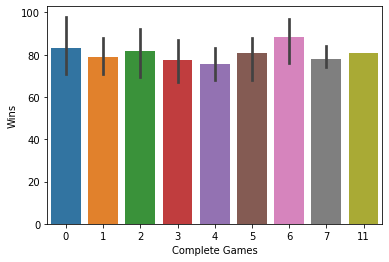

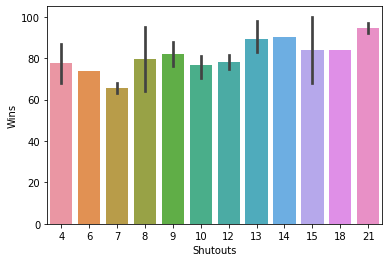

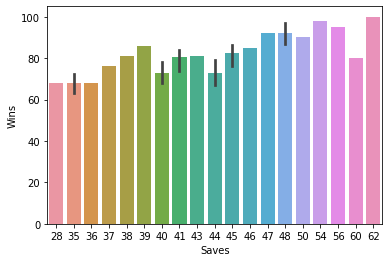

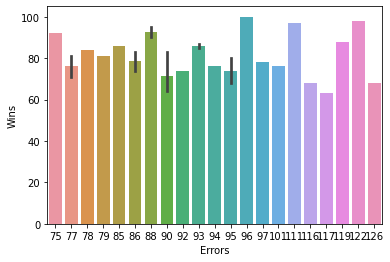

In [51]:
index=0
features=df1.drop("Wins",axis=1)
for col,value in features.items():
    sns.barplot(x=col, y="Wins", data=df1)
    index+=1
    plt.show()

Relationship between feature and target variable observed



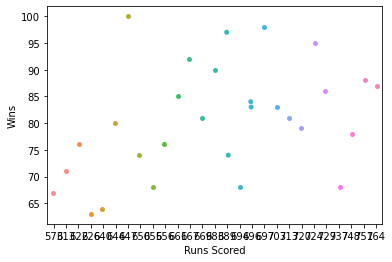

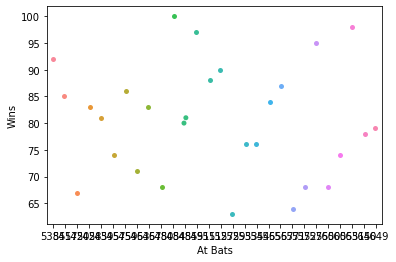

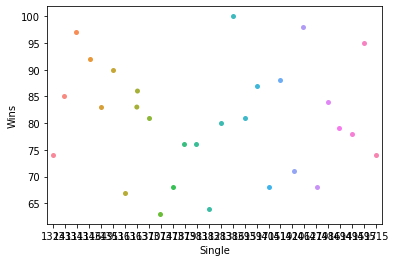

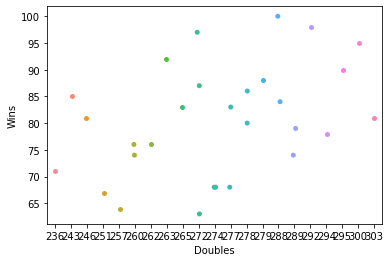

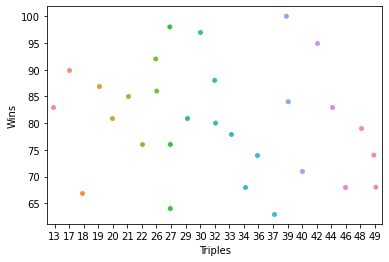

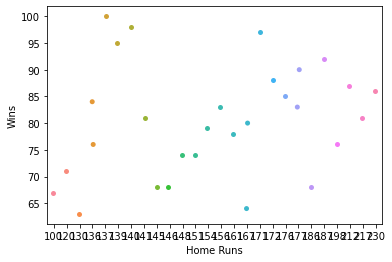

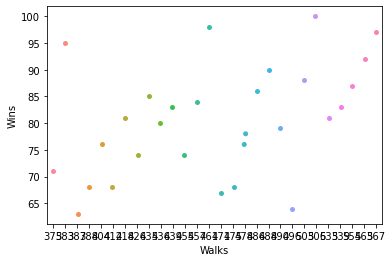

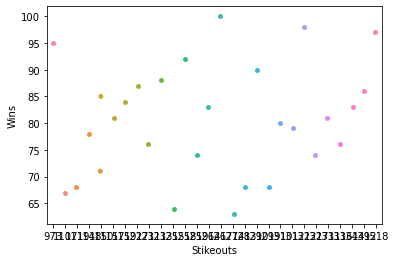

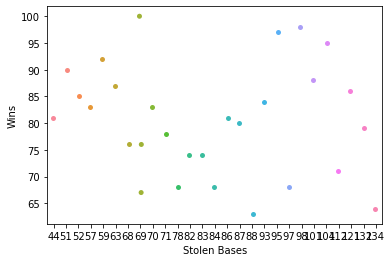

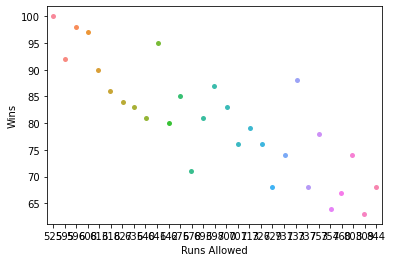

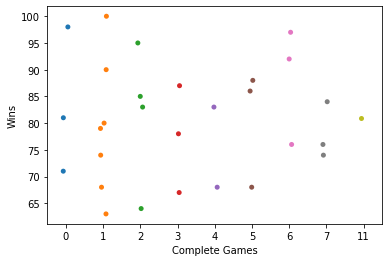

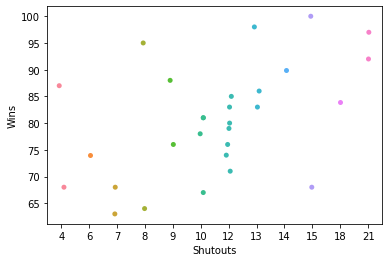

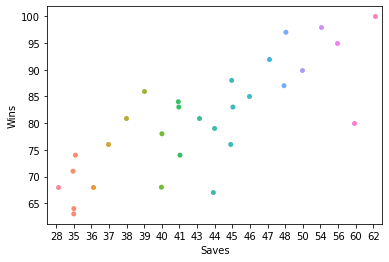

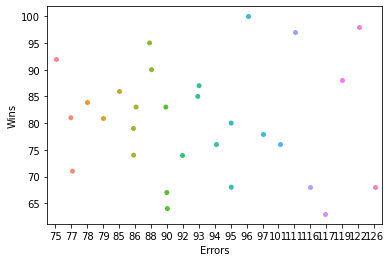

In [52]:
index=0
features=df1.drop("Wins",axis=1)
for col,value in features.items():
    sns.stripplot(x=col, y="Wins", data=df1)
    index+=1
    plt.show()

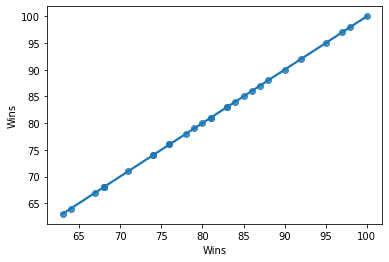

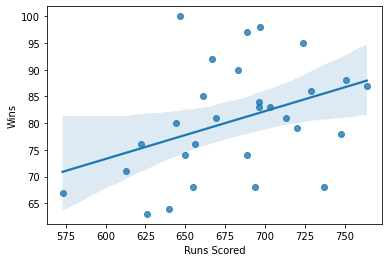

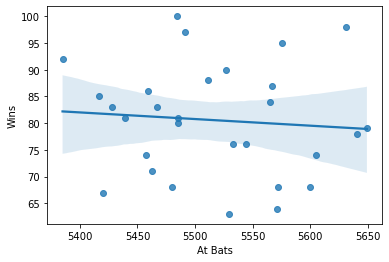

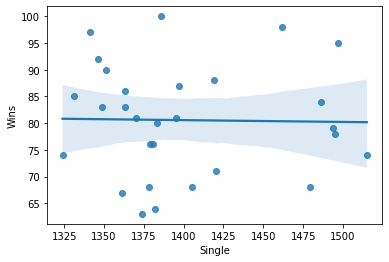

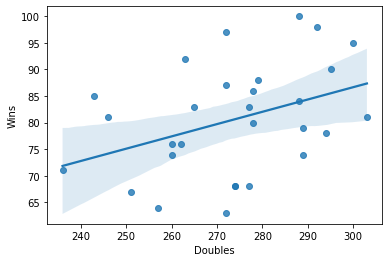

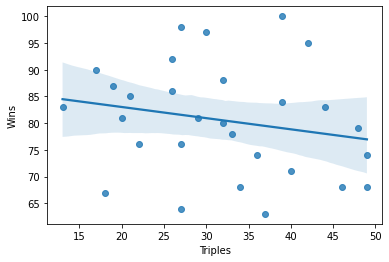

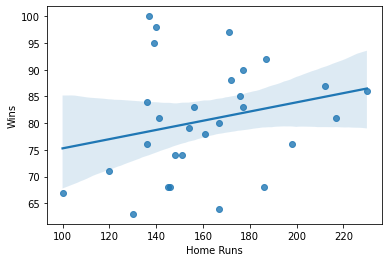

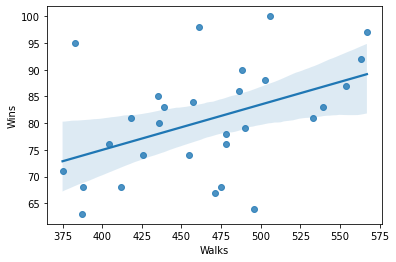

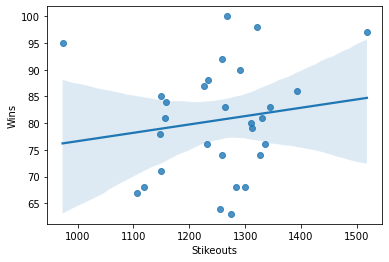

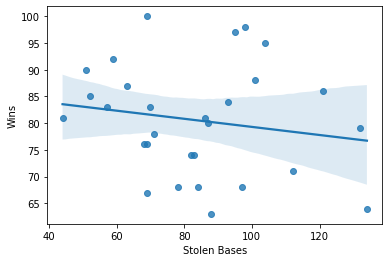

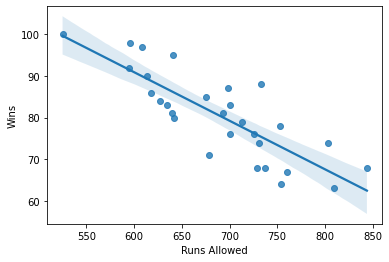

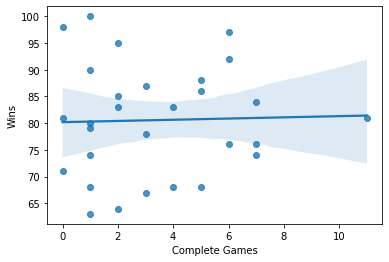

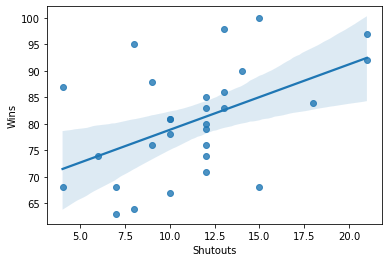

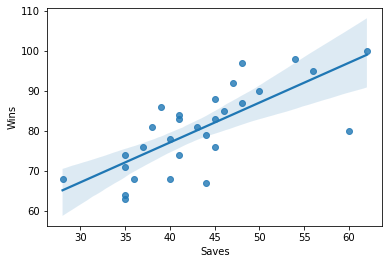

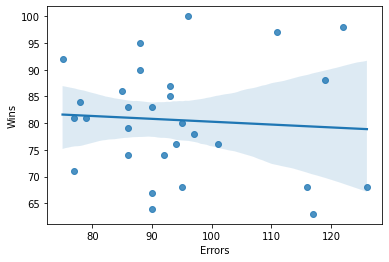

In [53]:
for i in df1:
    sns.regplot(x=i, y="Wins", data=df1)
    plt.show()

Here we can observe that Columns Runs Scored, Doubles, Home Runs, Walks, Strikeouts, Shutouts and Saves are highly correlated with our target column Wins.


# Multivariate Analysis:


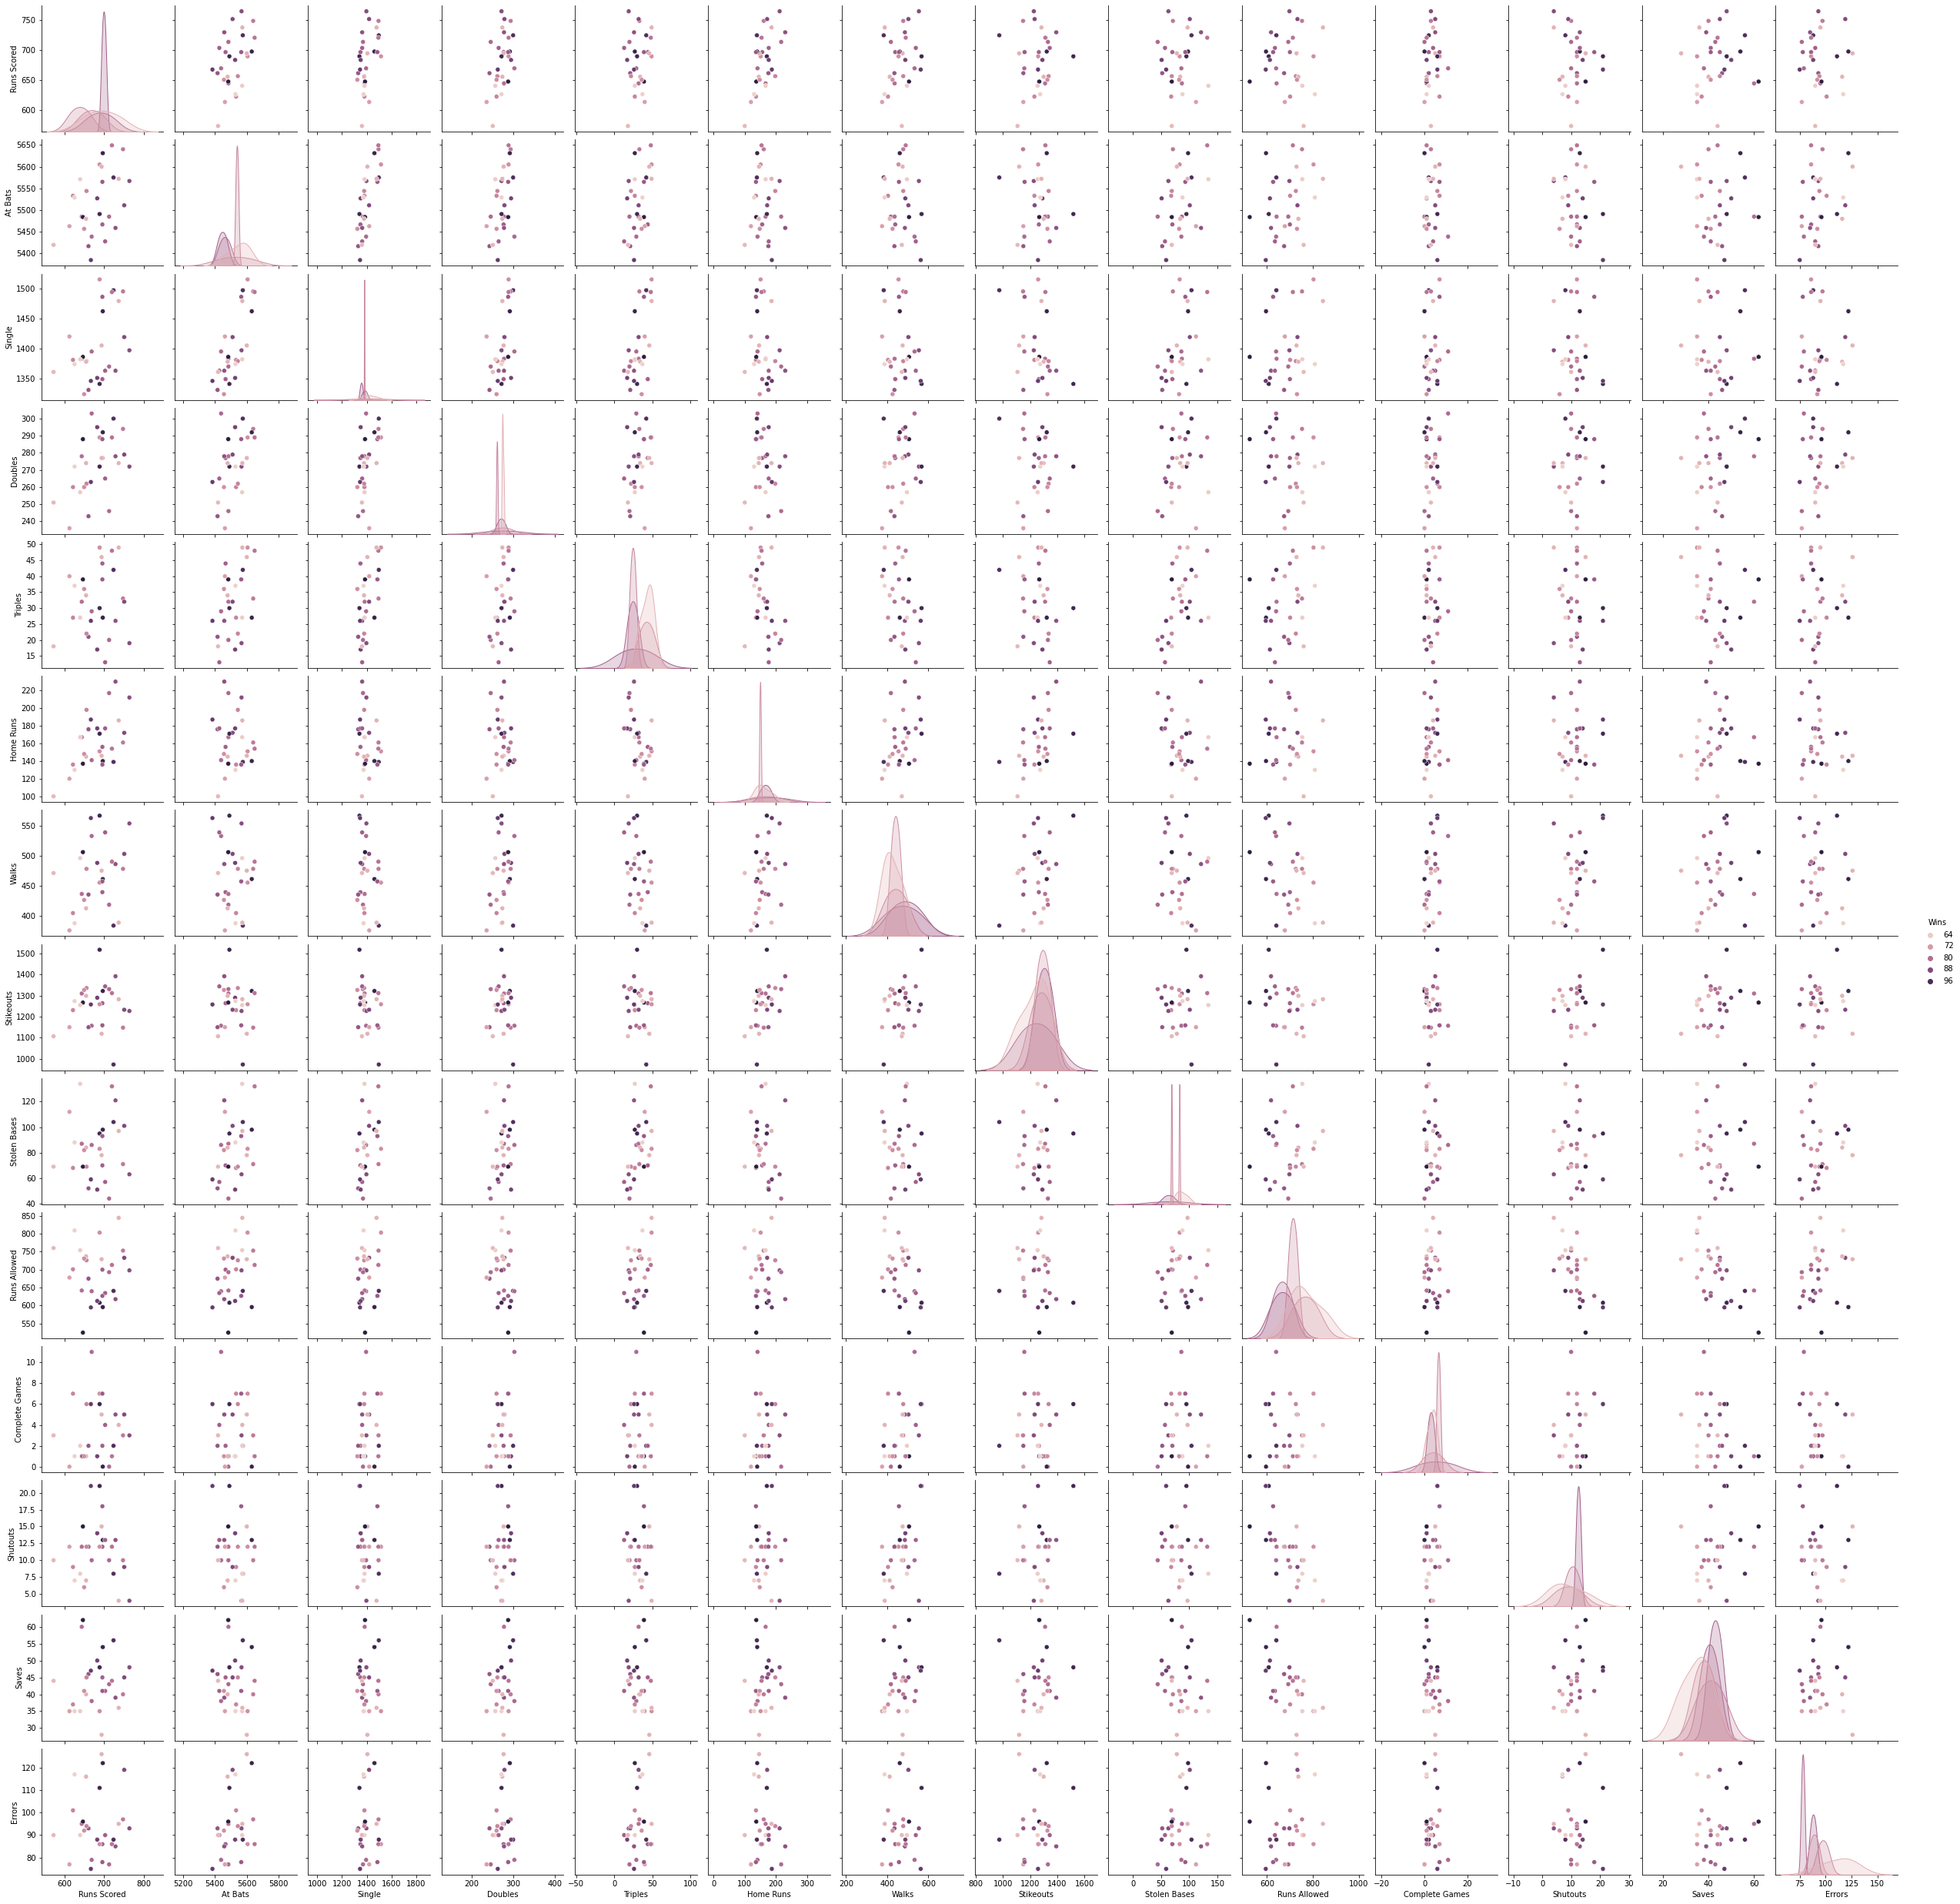

In [56]:
# Lets do this Multvariate Analysis using pair plot
sns.pairplot(df1, hue="Wins")

Above the pair plots of each pair of features. I can observe whether they are making good correlation or if they are just scattered with out any pattern.



In [57]:
features.head()

,Runs Scored,At Bats,Single,Doubles,Triples,Home Runs,Walks,Stikeouts,Stolen Bases,Runs Allowed,Complete Games,Shutouts,Saves,Errors
0,724,5575,1497,300,42,139,383,973,104,641,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,7,12,35,86


# Standardization_Scaling:


In [61]:
x=features
y=df1["Wins"]

In [62]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
def vif(x):
    vif=pd.DataFrame()
    vif['VARIABLES']=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [64]:
vif(x)

,VARIABLES,VIF FACTOR
0,Runs Scored,1514.482242
1,At Bats,3858.355047
2,Single,3837.311630
3,Doubles,815.860126
4,Triples,34.420497
5,Home Runs,184.136303
6,Walks,234.111144
7,Stikeouts,319.059772
8,Stolen Bases,27.021007
9,Runs Allowed,468.356493


In [65]:
# lets import libraries required for Scaling first
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [67]:
sc.fit(df1)
sd=sc.transform(df1)
sd

array([[0.86486486, 0.79057592, 0.71969697, 0.90575916, 0.95522388,
        0.80555556, 0.3       , 0.04166667, 0.        , 0.66666667,
        0.36363636, 0.18181818, 0.23529412, 0.82352941, 0.25490196],
       [0.54054054, 0.64397906, 0.31060606, 0.13089005, 0.6119403 ,
        0.86111111, 0.43076923, 0.33333333, 0.53394495, 0.28888889,
        0.54858934, 0.18181818, 0.47058824, 0.5       , 0.21568627],
       [0.48648649, 0.5026178 , 0.20454545, 0.37172775, 1.        ,
        0.44444444, 0.31538462, 0.82291667, 0.33761468, 0.46666667,
        0.36050157, 1.        , 0.35294118, 0.29411765, 0.07843137],
       [0.35135135, 0.2565445 , 0.56060606, 0.29842932, 0.35820896,
        0.38888889, 0.27692308, 0.15104167, 0.4733945 , 0.26666667,
        0.55172414, 0.63636364, 0.29411765, 0.26470588, 0.50980392],
       [0.2972973 , 0.60732984, 0.83333333, 1.        , 0.79104478,
        1.        , 0.39230769, 0.41666667, 0.52477064, 0.43333333,
        0.87147335, 0.63636364, 0.47058824, 

In [68]:
from sklearn.decomposition import PCA

pca=PCA(n_components=7)
x1=sd[:,1:]
y1=sd[:,0]

In [69]:
pca.fit(x1)
x2=pca.transform(x1)
d=pd.DataFrame(data=x2)
d

,0,1,2,3,4,5,6
0,-0.804954,-0.107643,-0.378583,0.263305,-0.529067,-0.219158,0.123564
1,0.074234,0.143866,-0.150813,0.015711,-0.127263,0.070961,-0.356888
2,0.170979,-0.425376,-0.290990,-0.621282,0.141969,-0.324974,0.272403
3,0.052602,0.430701,-0.029705,-0.176542,0.240837,-0.292395,0.015762
4,-0.808360,-0.171494,-0.074876,-0.490836,0.011341,-0.122811,-0.200365
5,0.190249,-0.372947,0.717290,0.056684,-0.305811,-0.212277,0.234781
6,0.517002,0.288959,0.418879,0.009298,-0.599539,0.037798,-0.269501
7,0.169263,0.039686,-0.234270,0.441230,-0.161789,0.125125,-0.006126
8,-0.636550,-0.326036,0.259299,-0.013258,-0.153527,-0.349658,0.007810
9,-0.226125,-0.244448,0.369009,0.093748,0.292057,-0.020505,0.082300


In [70]:
sd.shape

(29, 15)

In [71]:
# lets Perform Standard Scaling on the sd
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std.fit(sd)
std_scale=sc.transform(sd)

sdf=pd.DataFrame(data=std_scale)
sdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.679328,-2.995861,-20.395001,-6.927195,-3.508131,-0.338735,-0.766923,-1.952908,-1.785321,-0.481481,-1.644628,0.016529,-0.221453,-0.799308,-1.465590
1,-1.688093,-2.996628,-20.396551,-6.931252,-3.513255,-0.337191,-0.765917,-1.951389,-1.784341,-0.485679,-1.644048,0.016529,-0.207612,-0.808824,-1.466359
2,-1.689554,-2.997368,-20.396952,-6.929991,-3.507463,-0.348765,-0.766805,-1.948839,-1.784702,-0.483704,-1.644638,0.090909,-0.214533,-0.814879,-1.469050
3,-1.693207,-2.998657,-20.395604,-6.930375,-3.517042,-0.350309,-0.767101,-1.952338,-1.784452,-0.485926,-1.644038,0.057851,-0.217993,-0.815744,-1.460592
4,-1.694668,-2.996820,-20.394571,-6.926702,-3.510581,-0.333333,-0.766213,-1.950955,-1.784358,-0.484074,-1.643036,0.057851,-0.207612,-0.817474,-1.466359
5,-1.685172,-2.994764,-20.395116,-6.929936,-3.514368,-0.356481,-0.762604,-1.948269,-1.784466,-0.486543,-1.644068,0.024793,-0.235294,-0.806228,-1.463668
6,-1.689554,-2.996162,-20.396292,-6.930676,-3.520160,-0.355710,-0.762308,-1.951959,-1.784116,-0.488889,-1.644117,0.000000,-0.214533,-0.810554,-1.469819
7,-1.690285,-2.998054,-20.396292,-6.930320,-3.513032,-0.346451,-0.765266,-1.951470,-1.784187,-0.483580,-1.644618,0.008264,-0.207612,-0.795848,-1.462899
8,-1.691746,-2.995203,-20.394069,-6.927250,-3.509468,-0.345679,-0.765621,-1.950331,-1.784732,-0.485556,-1.643527,0.024793,-0.214533,-0.813149,-1.462130
9,-1.684441,-2.995121,-20.395919,-6.929333,-3.512809,-0.346451,-0.764970,-1.949653,-1.784446,-0.481852,-1.643724,0.041322,-0.217993,-0.808824,-1.453672


In [72]:
x3=std_scale[:,1:]
y3=std_scale[:,0]
pca1=PCA(n_components=10)
pca1.fit(x3)
x3_pca=pca1.transform(x3)
sdf1=pd.DataFrame(data=x3_pca)
sdf1

,0,1,2,3,4,5,6,7,8,9
0,-0.014323,-0.006707,0.005646,0.013813,-0.004917,0.000440,0.000947,0.001136,-0.001216,-0.001106
1,-0.010153,0.004478,0.008460,0.000962,-0.004782,-0.002039,-0.002896,-0.000695,0.002159,-0.000050
2,0.060637,-0.019365,-0.004412,0.005446,-0.004100,0.002255,-0.000179,0.002909,0.002058,0.000096
3,0.027269,-0.015568,-0.005049,-0.002166,0.003206,-0.003970,0.000002,0.001926,-0.001185,-0.001092
4,0.030476,-0.007321,0.013133,-0.000204,-0.004214,0.000044,-0.002588,-0.000037,-0.001260,0.000406
5,-0.009319,-0.021578,-0.013834,0.005939,-0.000390,0.000800,-0.000745,-0.003087,-0.000340,0.002077
6,-0.027731,0.002884,-0.010476,-0.006783,-0.006096,-0.000352,-0.003173,-0.002732,-0.001154,-0.000801
7,-0.019335,0.009678,-0.001499,0.010373,-0.001024,-0.002771,0.001805,-0.000069,0.000304,-0.001011
8,-0.003475,-0.004549,0.001988,0.000384,0.001130,0.004657,-0.003688,0.000067,-0.001663,0.000749
9,0.010778,-0.010914,-0.000101,0.005237,0.008874,-0.000900,0.002643,-0.001961,-0.000326,0.000491


In [73]:
vif(sdf1)

,VARIABLES,VIF FACTOR
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
5,5,1.0
6,6,1.0
7,7,1.0
8,8,1.0
9,9,1.0


* Lets test performance of the Linear Regression Model with Min Max and Starndard Scaled Together to compare which performs better



# Linear regression:


In [75]:
# Lets import required libraries for Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [76]:
# Now lets seperate data for Training and Testing purpose
x_train,x_test,y_train,y_test=train_test_split(sdf1,y3,test_size=.25,random_state=40)
x_train.shape

(21, 10)

In [77]:
# Importing Libraries for Mean_squared_error and mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lin=LinearRegression()
lin.fit(x_train,y_train)
pre=lin.predict(x_test)
print("Acc. Score=  ", lin.score(x_train,y_train))
print("mean_squared_error: ", mean_squared_error(y_test,pre))
print("mean_absolute_error: ", mean_absolute_error(y_test,pre))
print("r2 Score: ", r2_score(y_test,pre))

Acc. Score=   0.7413768586516372
mean_squared_error:  2.625254582865039e-05
mean_absolute_error:  0.004315943491182861
r2 Score:  0.5776128983585163


In [78]:
# lets try linear regression with min-max scaled
x_train,x_test,y_train,y_test=train_test_split(d,y1,test_size=.33, random_state=42)
x_test.shape

(10, 7)

In [79]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print("Accuracy: ", lr.score(x_train,y_train))
pr=lr.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test,pr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pr))
print("r2 score: ",r2_score(y_test,pr))

Accuracy:  0.8780361489285172
mean_squared_error:  0.033308506730140706
mean_absolute_error:  0.15155311681316486
r2 score:  0.5547373721944866


Observation:-Linear Regression Model is performing better with Min-Max Scaled values as compared to Standard Scaler



# Regularization:


In [80]:
# lets try l1 and l2 Regularization
# importing required libraries
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [81]:
x_train,x_test,y_train,y_test=train_test_split(d,y1,test_size=.20,random_state=3)
y_test.shape

(6,)

In [82]:
# lets predict with Lasso first
las=Lasso(alpha=0.01)
las.fit(x_train,y_train)
pre=las.predict(x_test)
print("Accuracy: ",las.score(x_train,y_train))
print("mean_squared_error: ", mean_squared_error(y_test,pre))
print("mean_absolute_error: ",mean_absolute_error(y_test,pre))
print("r2_score: ",r2_score(y_test,pre))

Accuracy:  0.7521353434421203
mean_squared_error:  0.0469286467385597
mean_absolute_error:  0.20500280535327067
r2_score:  0.6255130463304444


In [83]:
# Lets predict with Ridge now
rid=Ridge(alpha=0.0001)
rid.fit(x_train,y_train)
pr=rid.predict(x_test)
print("Accuracy: ",rid.score(x_train,y_train))
print("mean_squared_error: ",mean_squared_error(y_test,pr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pr))
print("r2_score: ",r2_score(y_test,pr))

Accuracy:  0.818417487608036
mean_squared_error:  0.030410715730895682
mean_absolute_error:  0.16669882327666455
r2_score:  0.7573248519945818


In [84]:
# now lastly lets predict Elasticnet
net=ElasticNet(alpha=0.0001)
net.fit(x_train,y_train)
pred=net.predict(x_test)
print("Accuracy: ",net.score(x_train,y_train))
print("mean_squared_error: ",mean_squared_error(y_test,pred))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred))
print("r2_score: ",r2_score(y_test,pred))

Accuracy:  0.8184129995166036
mean_squared_error:  0.030554553522680078
mean_absolute_error:  0.1670658273694806
r2_score:  0.7561770375952452


* Ridge Regression is giving the best scores out of Lasso, Ridge and ElasticNet



# Random Forest Regressor:


In [85]:
# importing required libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print("Accuracy: ", rf.score(x_train,y_train))
print("mean_squared_error: ",mean_squared_error(y_test,pred))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred))
print("r2_score: ",r2_score(y_test,pred))

Accuracy:  0.8934695069714582
mean_squared_error:  0.046534623813002274
mean_absolute_error:  0.19099099099099112
r2_score:  0.628657318652849


* Random Forest is giving Good Accuracy and fine R2 Score.


# Decision Tree:


In [86]:
# lets download necessary libraries for Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print("Accuracy: ",dtr.score(x_train,y_train))
print("mean_square_error: ",mean_squared_error(y_test,pred))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred))
print("r2_score",r2_score(y_test,pred))

Accuracy:  1.0
mean_square_error:  0.036401266130995875
mean_absolute_error:  0.14864864864864866
r2_score 0.7095207253886009


* Decision Tree is giving 100 % accuracy score and good R2 score of 70%


# Gradient Boosting Regressor:


In [87]:
# lets download necessary libraries for Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print("Accuracy: ",gbr.score(x_train,y_train))
print("mean_square_error: ",mean_squared_error(y_test,pred))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred))
print("r2_score",r2_score(y_test,pred))

Accuracy:  0.9999992453537624
mean_square_error:  0.036401266130995875
mean_absolute_error:  0.14864864864864866
r2_score 0.7095207253886009


* Gradient Boosting Regressor has given the best score so far with accuracy of 99.99% and r2_score of 89%



# Cross Validation:


# Linear Regression:



In [88]:
# Lets check the cross validation Scores of all the models
# importing the required library
from sklearn.model_selection import cross_val_score
print(cross_val_score(lr,x,y,cv=5).mean())

0.22906517408504037


# Ridge :



In [89]:
print(cross_val_score(rid,x,y,cv=5).mean())

0.22906518938301773


# Elasticnet :



In [90]:
print(cross_val_score(net,x,y,cv=5).mean())

0.22906554001830362


# lasso:



In [91]:
print(cross_val_score(las,x,y,cv=5).mean())

0.2290916242050954


# Random Forest:



In [92]:
print(cross_val_score(rf,x,y,cv=5).mean())

-0.6568084961842189


# Decision Tree:



In [93]:
print(cross_val_score(dtr,x,y,cv=5).mean())

-2.171551051530119


# Gradient Boosting:



In [94]:
print(cross_val_score(gbr,x,y,cv=5).mean())

-1.5638670764743345


* Here you can see Cross validation scores of all the models tested above.


# Ensembling:


In [95]:
# importing required libraries for Ensembling
from sklearn.model_selection import GridSearchCV

In [96]:
Para={"n_estimators":[100], "criterion":["mse"], "min_samples_split":[2],"min_samples_leaf":[1]}

gb=GradientBoostingRegressor()
clf=GridSearchCV(gb,Para)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [97]:
gb=GradientBoostingRegressor(criterion='mse',min_samples_split=2,min_samples_leaf=1,n_estimators=100)
gb.fit(x_train,y_train)
gb.score(x_train,y_train)
pre_d=gb.predict(x_test)
gbs=r2_score(y_test,pre_d)
print("r2_score",gbs*100)

gbs_score=cross_val_score(gb,x,y,cv=5)
gbc=gbs_score.mean()
print("Cross_Val_Score",gbc*100)

r2_score 83.37840241695653
Cross_Val_Score -163.58058890963522


In [98]:
rf=RandomForestRegressor()
clf=GridSearchCV(rf,Para)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [99]:
rf= RandomForestRegressor(criterion="mse",min_samples_leaf=1,min_samples_split=2,n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print("R2_score",rfs*100)

rfs_score=cross_val_score(rf,x,y,cv=5)
rfc=rfs_score.mean()
print("Cross_val_score",rfc*100)

R2_score 57.75559909326417
Cross_val_score -70.60599060157912


* R2 score for random forest has increased from 24% to 51.4%, whereas for gradient boosting regressor r2 scored decreased from 92.8% to 84.3% which is still the best


# Final Conclusion:


As per my Research i found Gradient Boosting Regressor to be the best model with accuracy score of 99.9% and r2 score of 70% after cross validation.



# Saving the model:


In [100]:
import pickle
filename='BaseballCaseStudy.pkl'
pickle.dump(rf,open(filename,'wb'))

* Model has been Saved Successfully


# loading the model:


In [101]:
loaded_model=pickle.load(open('BaseballCaseStudy.pkl','rb'))
Result=loaded_model.score(x_test,y_test)
print(Result)

0.5775559909326418


# Predicting Wins:


In [102]:
pw=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Original"])
pw

,0,1,2,3,4,5
Predicted,0.291892,0.334324,0.402432,0.521351,0.635405,0.601351
Original,0.291892,0.334324,0.402432,0.521351,0.635405,0.601351


# Conclusion:

Both original and predicted values are almost equal.

